<a href="https://colab.research.google.com/github/nikogarro/thesis/blob/main/Pill_Anomaly_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/nikogarro/thesis.git

Cloning into 'thesis'...
remote: Enumerating objects: 73, done.
remote: Counting objects: 100% (73/73), done.
remote: Compressing objects: 100% (68/68), done.
remote: Total 73 (delta 29), reused 5 (delta 0), pack-reused 0
Receiving objects: 100% (73/73), 3.53 MiB | 9.63 MiB/s, done.
Resolving deltas: 100% (29/29), done.


In [2]:
ls

sample_data/  thesis/


Data by MVTec Anomaly Detection Dataset (MVTec AD)

Paul Bergmann, Michael Fauser, David Sattlegger, and Carsten Steger,
"A Comprehensive Real-World Dataset for Unsupervised Anomaly Detection",
IEEE Conference on Computer Vision and Pattern Recognition, 2019

In [3]:
!wget https://www.mydrive.ch/shares/43421/11a215a5749fcfb75e331ddd5f8e43ee/download/420938129-1629953099/pill.tar.xz

--2023-09-03 09:22:35--  https://www.mydrive.ch/shares/43421/11a215a5749fcfb75e331ddd5f8e43ee/download/420938129-1629953099/pill.tar.xz
Resolving www.mydrive.ch (www.mydrive.ch)... 91.214.169.64
Connecting to www.mydrive.ch (www.mydrive.ch)|91.214.169.64|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://stor-ch.mydrive.ch/download/ff5c8e4128034e988e94e16f38311058e67b9d383b3346ddb2ff8c92a22b4d58?1629953099 [following]
--2023-09-03 09:22:36--  https://stor-ch.mydrive.ch/download/ff5c8e4128034e988e94e16f38311058e67b9d383b3346ddb2ff8c92a22b4d58?1629953099
Resolving stor-ch.mydrive.ch (stor-ch.mydrive.ch)... 91.214.169.64
Connecting to stor-ch.mydrive.ch (stor-ch.mydrive.ch)|91.214.169.64|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 275267152 (263M) [application/x-xz]
Saving to: ‘pill.tar.xz’

pill.tar.xz         100%[===================>] 262.51M  21.0MB/s    in 13s     

2023-09-03 09:22:50 (19.7 MB/s) - ‘pill.tar.xz’ saved

In [4]:
!tar -xf pill.tar.xz

In [5]:
import sys
sys.path.append('/content/thesis/utils/')

In [6]:
%load_ext autoreload
%autoreload 2

# Import necessary libraries and files

In [7]:
import os
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim

from dataloader import get_train_test_loaders, get_cv_train_test_loaders
from model import CustomVGG
from helper import train, evaluate, predict_localize
from constants import NEG_CLASS

# Setting Hyper-Parameters

In [8]:
data_folder = "/content"
subset_name = "pill"
data_folder = os.path.join(data_folder, subset_name)

batch_size = 10
target_train_accuracy = 0.98
lr = 0.0001
epochs = 30
class_weight = [1, 3] if NEG_CLASS == 1 else [3, 1]
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

heatmap_thres = 0.7
n_cv_folds = 5

# Data loading

In [9]:
train_loader, test_loader = get_train_test_loaders(
    root=data_folder, batch_size=batch_size, test_size=0.2, random_state=42)

Dataset /content/pill: N Images = 434, Share of anomalies = 0.325


# Model Training with VGG16


In [10]:
model = CustomVGG()

class_weight = torch.tensor(class_weight).type(torch.FloatTensor).to(device)
criterion = nn.CrossEntropyLoss(weight=class_weight)
optimizer = optim.Adam(model.parameters(), lr=lr)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth
100%|██████████| 528M/528M [00:06<00:00, 91.1MB/s]


Epoch 1/30: Loss = 0.6744, Accuracy = 0.4088
Epoch 2/30: Loss = 0.6047, Accuracy = 0.6559
Epoch 3/30: Loss = 0.5664, Accuracy = 0.6588
Epoch 4/30: Loss = 0.5275, Accuracy = 0.7441
Epoch 5/30: Loss = 0.3818, Accuracy = 0.8382
Epoch 6/30: Loss = 0.4663, Accuracy = 0.8088
Epoch 7/30: Loss = 0.3722, Accuracy = 0.8324
Epoch 8/30: Loss = 0.4278, Accuracy = 0.8441
Epoch 9/30: Loss = 0.3386, Accuracy = 0.8735
Epoch 10/30: Loss = 0.3002, Accuracy = 0.8971
Epoch 11/30: Loss = 0.3032, Accuracy = 0.8853
Epoch 12/30: Loss = 0.2809, Accuracy = 0.9118
Epoch 13/30: Loss = 0.2470, Accuracy = 0.9265
Epoch 14/30: Loss = 0.2581, Accuracy = 0.9176
Epoch 15/30: Loss = 0.2108, Accuracy = 0.9441
Epoch 16/30: Loss = 0.2039, Accuracy = 0.9441
Epoch 17/30: Loss = 0.3785, Accuracy = 0.8735
Epoch 18/30: Loss = 0.2271, Accuracy = 0.9324
Epoch 19/30: Loss = 0.1947, Accuracy = 0.9471
Epoch 20/30: Loss = 0.1579, Accuracy = 0.9588
Epoch 21/30: Loss = 0.1481, Accuracy = 0.9529
Epoch 22/30: Loss = 0.1727, Accuracy = 0.95

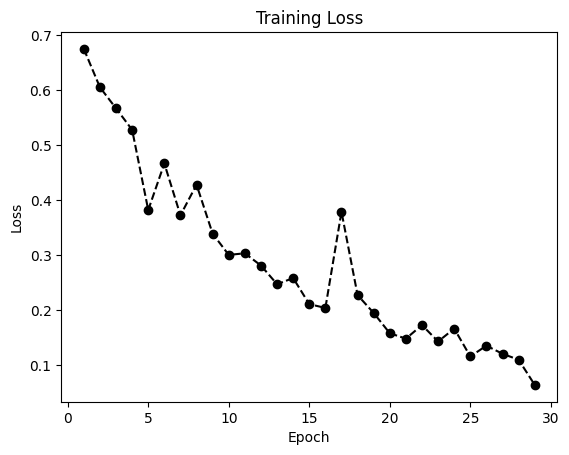

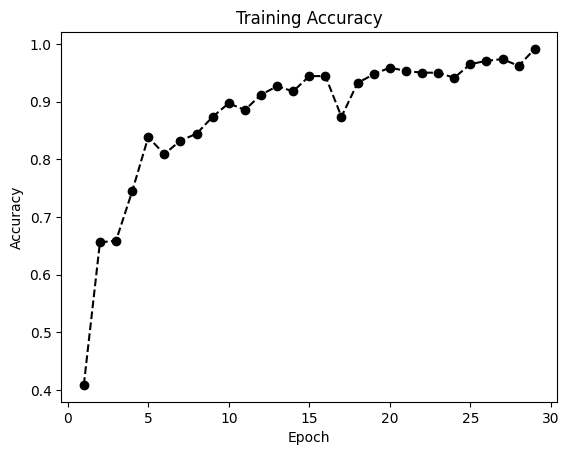

In [11]:
model = train(
    train_loader, model, optimizer, criterion, epochs, device, target_train_accuracy)

In [ ]:
# model_path = f"/content/{subset_name}_model.h5"
# torch.save(model, model_path)
# model = torch.load(model_path, map_location=device)

In [13]:
from torchsummary import summary
summary(model, (3,224,224))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 224, 224]           1,792
              ReLU-2         [-1, 64, 224, 224]               0
            Conv2d-3         [-1, 64, 224, 224]          36,928
              ReLU-4         [-1, 64, 224, 224]               0
         MaxPool2d-5         [-1, 64, 112, 112]               0
            Conv2d-6        [-1, 128, 112, 112]          73,856
              ReLU-7        [-1, 128, 112, 112]               0
            Conv2d-8        [-1, 128, 112, 112]         147,584
              ReLU-9        [-1, 128, 112, 112]               0
        MaxPool2d-10          [-1, 128, 56, 56]               0
           Conv2d-11          [-1, 256, 56, 56]         295,168
             ReLU-12          [-1, 256, 56, 56]               0
           Conv2d-13          [-1, 256, 56, 56]         590,080
             ReLU-14          [-1, 256,

## Evaluation

Accuracy: 0.8391
Balanced Accuracy: 0.8720



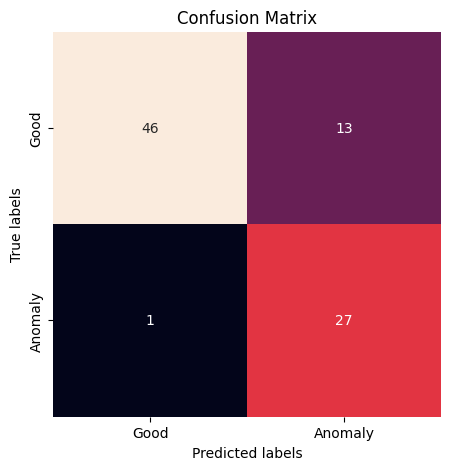

              precision    recall  f1-score   support

        Good      0.979     0.780     0.868        59
     Anomaly      0.675     0.964     0.794        28

    accuracy                          0.839        87
   macro avg      0.827     0.872     0.831        87
weighted avg      0.881     0.839     0.844        87



In [14]:
evaluate(model, test_loader, device)


# Cross Validation


Dataset /content/pill: N Images = 434, Share of anomalies = 0.325
Fold 1/5


<ipython-input-15-288a1d4d0cea>:7: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  class_weight = torch.tensor(class_weight).type(torch.FloatTensor).to(device)
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Epoch 1/30: Loss = 0.6861, Accuracy = 0.5618
Epoch 2/30: Loss = 0.6797, Accuracy = 0.4706
Epoch 3/30: Loss = 0.5979, Accuracy = 0.5588
Epoch 4/30: Loss = 0.5283, Accuracy = 0.7206
Epoch 5/30: Loss = 0.4357, Accuracy = 0.7971
Epoch 6/30: Loss = 0.4575, Accuracy = 0.7588
Epoch 7/30: Loss = 0.4374, Accuracy = 0.8147
Epoch 8/30: Loss = 0.3686, Accuracy = 0.8559
Epoch 9/30: Loss = 0.3586, Accuracy = 0.8588
Epoch 10/30: Loss = 0.3261, Accuracy = 0.8912
Epoch 11/30: Loss = 0.3442, Accuracy = 0.8676
Epoch 12/30: Loss = 0.2801, Accuracy = 0.8941
Epoch 13/30: Loss = 0.3292, Accuracy = 0.8794
Epoch 14/30: Loss = 0.2821, Accuracy = 0.9118
Epoch 15/30: Loss = 0.3062, Accuracy = 0.8941
Epoch 16/30: Loss = 0.3245, Accuracy = 0.8824
Epoch 17/30: Loss = 0.2018, Accuracy = 0.9441
Epoch 18/30: Loss = 0.1959, Accuracy = 0.9294
Epoch 19/30: Loss = 0.2240, Accuracy = 0.9382
Epoch 20/30: Loss = 0.2747, Accuracy = 0.8882
Epoch 21/30: Loss = 0.2074, Accuracy = 0.9235
Epoch 22/30: Loss = 0.1463, Accuracy = 0.95

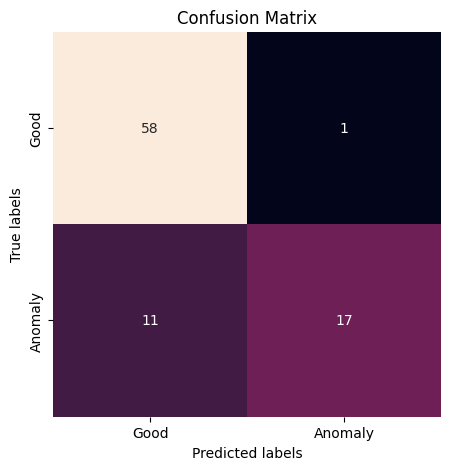

              precision    recall  f1-score   support

        Good      0.841     0.983     0.906        59
     Anomaly      0.944     0.607     0.739        28

    accuracy                          0.862        87
   macro avg      0.893     0.795     0.823        87
weighted avg      0.874     0.862     0.852        87

Fold 2/5


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Epoch 1/30: Loss = 0.6960, Accuracy = 0.5088
Epoch 2/30: Loss = 0.6453, Accuracy = 0.4147
Epoch 3/30: Loss = 0.5071, Accuracy = 0.7206
Epoch 4/30: Loss = 0.4569, Accuracy = 0.8147
Epoch 5/30: Loss = 0.4514, Accuracy = 0.7971
Epoch 6/30: Loss = 0.3669, Accuracy = 0.8500
Epoch 7/30: Loss = 0.4226, Accuracy = 0.8706
Epoch 8/30: Loss = 0.3371, Accuracy = 0.8676
Epoch 9/30: Loss = 0.3193, Accuracy = 0.8735
Epoch 10/30: Loss = 0.2756, Accuracy = 0.8971
Epoch 11/30: Loss = 0.3738, Accuracy = 0.8735
Epoch 12/30: Loss = 0.3004, Accuracy = 0.8765
Epoch 13/30: Loss = 0.2194, Accuracy = 0.9235
Epoch 14/30: Loss = 0.2214, Accuracy = 0.9206
Epoch 15/30: Loss = 0.1606, Accuracy = 0.9471
Epoch 16/30: Loss = 0.1079, Accuracy = 0.9618
Epoch 17/30: Loss = 0.1978, Accuracy = 0.9382
Epoch 18/30: Loss = 0.1598, Accuracy = 0.9500
Epoch 19/30: Loss = 0.1389, Accuracy = 0.9559
Epoch 20/30: Loss = 0.1107, Accuracy = 0.9647
Epoch 21/30: Loss = 0.0859, Accuracy = 0.9647
Epoch 22/30: Loss = 0.1046, Accuracy = 0.96

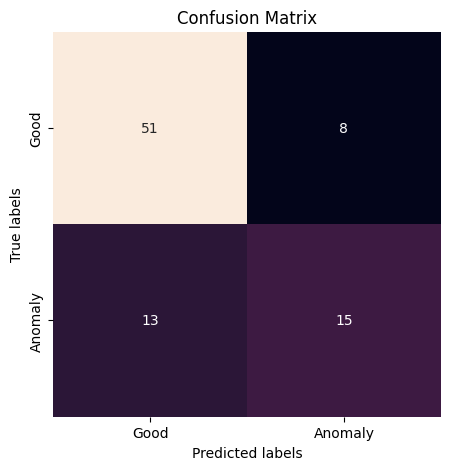

              precision    recall  f1-score   support

        Good      0.797     0.864     0.829        59
     Anomaly      0.652     0.536     0.588        28

    accuracy                          0.759        87
   macro avg      0.725     0.700     0.709        87
weighted avg      0.750     0.759     0.752        87

Fold 3/5


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Epoch 1/30: Loss = 0.6846, Accuracy = 0.3529
Epoch 2/30: Loss = 0.6289, Accuracy = 0.4618
Epoch 3/30: Loss = 0.5745, Accuracy = 0.6647
Epoch 4/30: Loss = 0.4589, Accuracy = 0.8029
Epoch 5/30: Loss = 0.4654, Accuracy = 0.7765
Epoch 6/30: Loss = 0.3937, Accuracy = 0.8529
Epoch 7/30: Loss = 0.4093, Accuracy = 0.8529
Epoch 8/30: Loss = 0.3464, Accuracy = 0.8529
Epoch 9/30: Loss = 0.2962, Accuracy = 0.8882
Epoch 10/30: Loss = 0.3123, Accuracy = 0.8765
Epoch 11/30: Loss = 0.2357, Accuracy = 0.9324
Epoch 12/30: Loss = 0.2559, Accuracy = 0.9176
Epoch 13/30: Loss = 0.2343, Accuracy = 0.9206
Epoch 14/30: Loss = 0.2293, Accuracy = 0.9324
Epoch 15/30: Loss = 0.2017, Accuracy = 0.9382
Epoch 16/30: Loss = 0.1660, Accuracy = 0.9500
Epoch 17/30: Loss = 0.3855, Accuracy = 0.8824
Epoch 18/30: Loss = 0.2038, Accuracy = 0.9294
Epoch 19/30: Loss = 0.1326, Accuracy = 0.9559
Epoch 20/30: Loss = 0.1597, Accuracy = 0.9500
Epoch 21/30: Loss = 0.1569, Accuracy = 0.9559
Epoch 22/30: Loss = 0.1334, Accuracy = 0.97

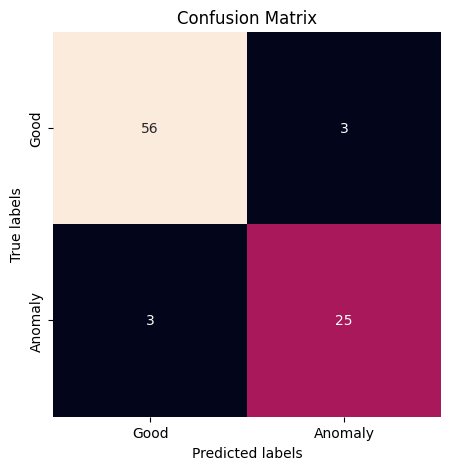

              precision    recall  f1-score   support

        Good      0.949     0.949     0.949        59
     Anomaly      0.893     0.893     0.893        28

    accuracy                          0.931        87
   macro avg      0.921     0.921     0.921        87
weighted avg      0.931     0.931     0.931        87

Fold 4/5


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Epoch 1/30: Loss = 0.6698, Accuracy = 0.4853
Epoch 2/30: Loss = 0.6131, Accuracy = 0.6412
Epoch 3/30: Loss = 0.5275, Accuracy = 0.7059
Epoch 4/30: Loss = 0.5103, Accuracy = 0.7559
Epoch 5/30: Loss = 0.4316, Accuracy = 0.8382
Epoch 6/30: Loss = 0.4103, Accuracy = 0.8324
Epoch 7/30: Loss = 0.3671, Accuracy = 0.8618
Epoch 8/30: Loss = 0.3742, Accuracy = 0.8588
Epoch 9/30: Loss = 0.3041, Accuracy = 0.8824
Epoch 10/30: Loss = 0.3203, Accuracy = 0.8647
Epoch 11/30: Loss = 0.3221, Accuracy = 0.9176
Epoch 12/30: Loss = 0.2474, Accuracy = 0.9353
Epoch 13/30: Loss = 0.2156, Accuracy = 0.9294
Epoch 14/30: Loss = 0.1686, Accuracy = 0.9471
Epoch 15/30: Loss = 0.2282, Accuracy = 0.9235
Epoch 16/30: Loss = 0.2268, Accuracy = 0.9147
Epoch 17/30: Loss = 0.2981, Accuracy = 0.9029
Epoch 18/30: Loss = 0.2292, Accuracy = 0.9471
Epoch 19/30: Loss = 0.1786, Accuracy = 0.9265
Epoch 20/30: Loss = 0.1236, Accuracy = 0.9706
Epoch 21/30: Loss = 0.1993, Accuracy = 0.9206
Epoch 22/30: Loss = 0.1964, Accuracy = 0.94

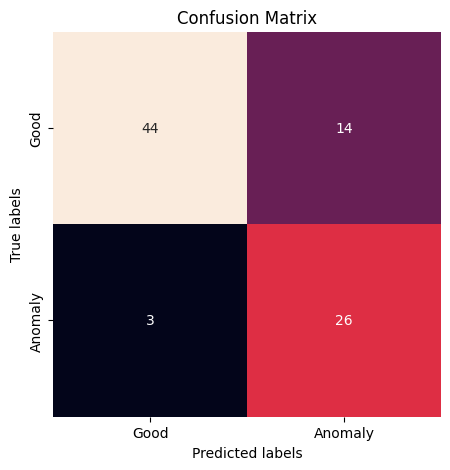

              precision    recall  f1-score   support

        Good      0.936     0.759     0.838        58
     Anomaly      0.650     0.897     0.754        29

    accuracy                          0.805        87
   macro avg      0.793     0.828     0.796        87
weighted avg      0.841     0.805     0.810        87

Fold 5/5


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Epoch 1/30: Loss = 0.6920, Accuracy = 0.4235
Epoch 2/30: Loss = 0.6430, Accuracy = 0.3882
Epoch 3/30: Loss = 0.5983, Accuracy = 0.6912
Epoch 4/30: Loss = 0.5179, Accuracy = 0.7471
Epoch 5/30: Loss = 0.4759, Accuracy = 0.7500
Epoch 6/30: Loss = 0.4463, Accuracy = 0.8176
Epoch 7/30: Loss = 0.3817, Accuracy = 0.8382
Epoch 8/30: Loss = 0.3426, Accuracy = 0.8941
Epoch 9/30: Loss = 0.3808, Accuracy = 0.8882
Epoch 10/30: Loss = 0.3404, Accuracy = 0.8735
Epoch 11/30: Loss = 0.3089, Accuracy = 0.8794
Epoch 12/30: Loss = 0.2669, Accuracy = 0.9029
Epoch 13/30: Loss = 0.2346, Accuracy = 0.9235
Epoch 14/30: Loss = 0.2694, Accuracy = 0.9235
Epoch 15/30: Loss = 0.2341, Accuracy = 0.9059
Epoch 16/30: Loss = 0.2459, Accuracy = 0.9235
Epoch 17/30: Loss = 0.2159, Accuracy = 0.9294
Epoch 18/30: Loss = 0.2180, Accuracy = 0.9176
Epoch 19/30: Loss = 0.1797, Accuracy = 0.9588
Epoch 20/30: Loss = 0.1604, Accuracy = 0.9382
Epoch 21/30: Loss = 0.2138, Accuracy = 0.9353
Epoch 22/30: Loss = 0.1817, Accuracy = 0.93

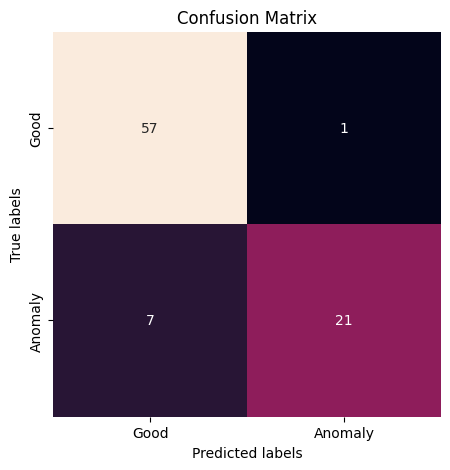

              precision    recall  f1-score   support

        Good      0.891     0.983     0.934        58
     Anomaly      0.955     0.750     0.840        28

    accuracy                          0.907        86
   macro avg      0.923     0.866     0.887        86
weighted avg      0.911     0.907     0.904        86



In [15]:
cv_folds = get_cv_train_test_loaders(
    root=data_folder,
    batch_size=batch_size,
    n_folds=n_cv_folds,
)

class_weight = torch.tensor(class_weight).type(torch.FloatTensor).to(device)
criterion = nn.CrossEntropyLoss(weight=class_weight)

for i, (train_loader, test_loader) in enumerate(cv_folds):
    print(f"Fold {i+1}/{n_cv_folds}")
    model = CustomVGG()
    optimizer = optim.Adam(model.parameters(), lr=lr)
    model = train(train_loader, model, optimizer, criterion, epochs, device)
    evaluate(model, test_loader, device)

# Visualization

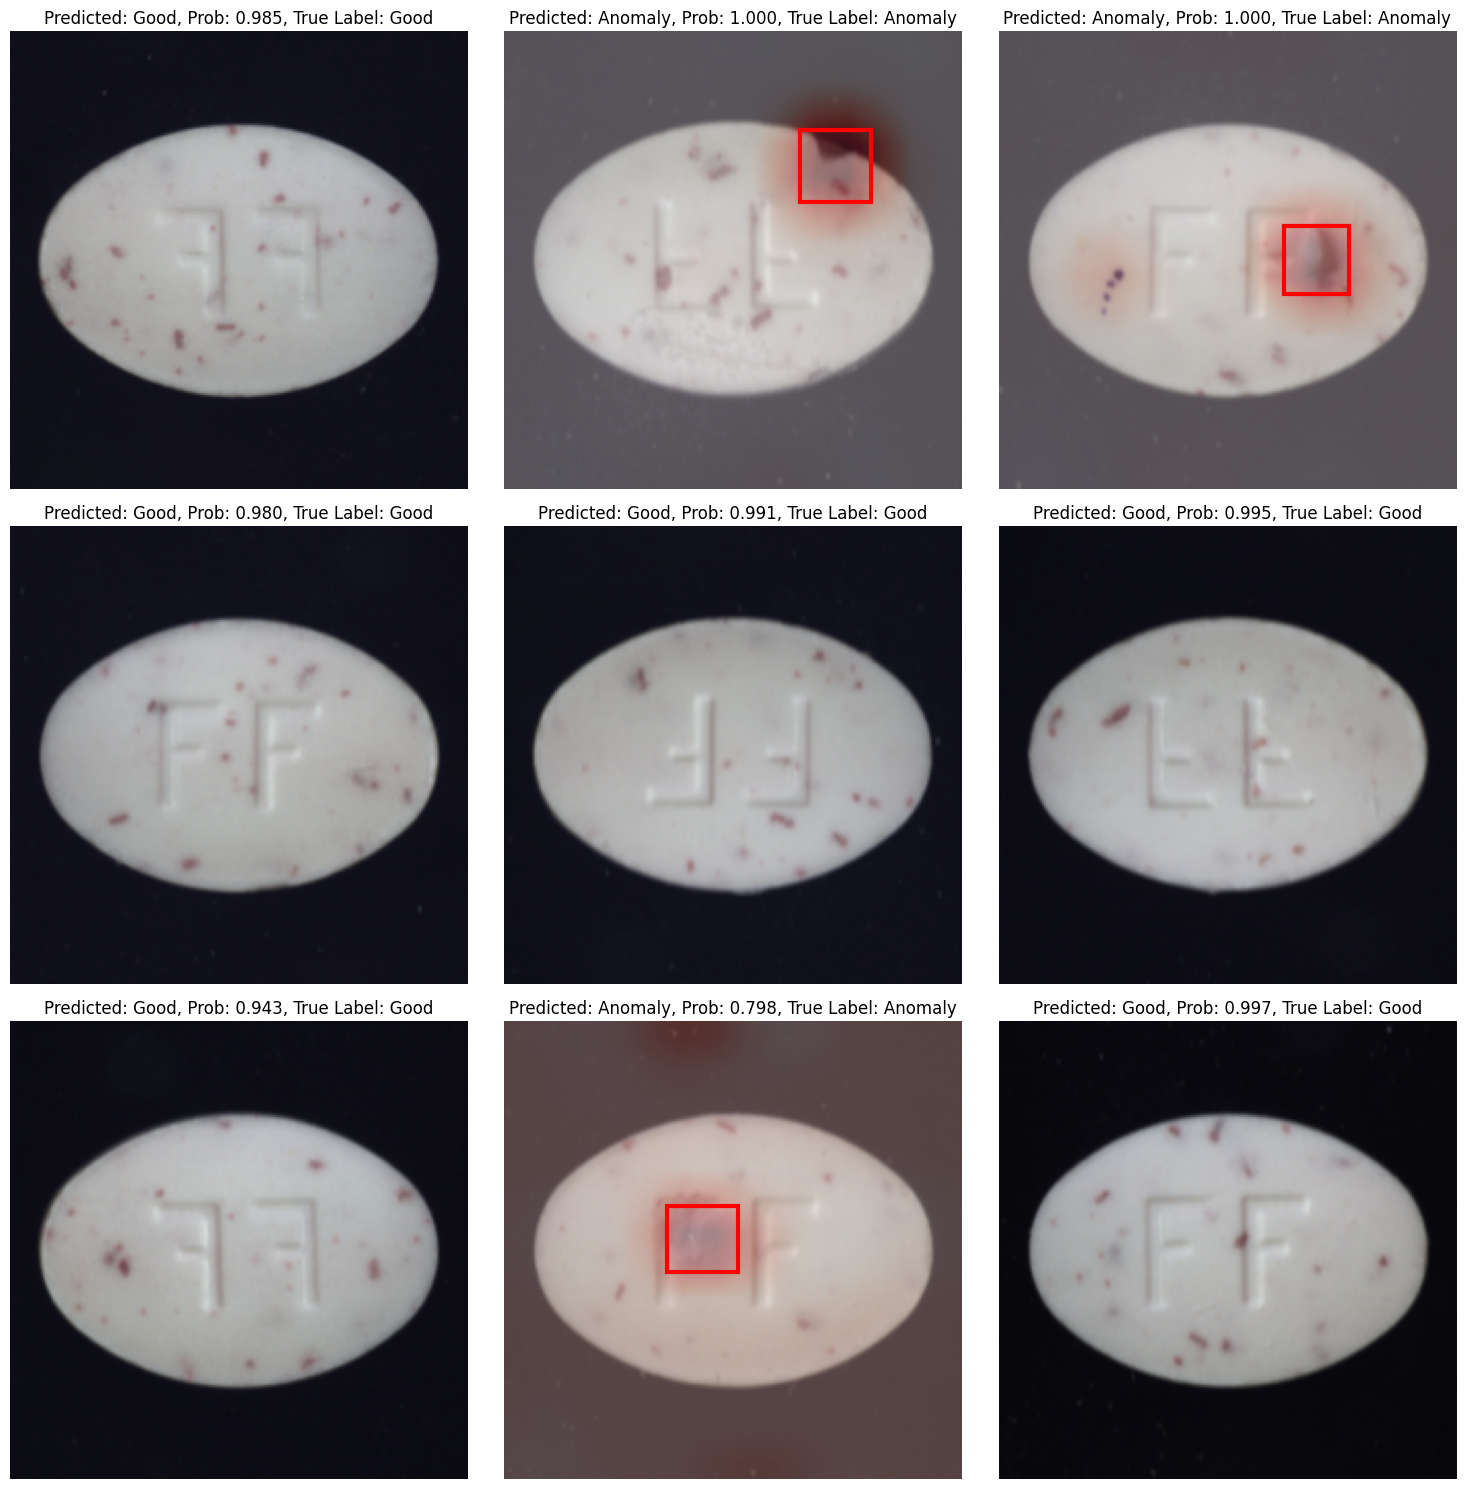

In [20]:
predict_localize(
    model, test_loader, device, thres=heatmap_thres, n_samples=9, show_heatmap=True)

# References

[1] Zhou, Bolei, Aditya Khosla, Agata Lapedriza, Aude Oliva, and Antonio Torralba: Learning deep features for discriminative localization; in: Proceedings of the IEEE conference on computer vision and pattern recognition, 2016. [pdf](https://arxiv.org/pdf/1512.04150.pdf)

[2] Paul Bergmann, Kilian Batzner, Michael Fauser, David Sattlegger, Carsten Steger: The MVTec Anomaly Detection Dataset: A Comprehensive Real-World Dataset for Unsupervised Anomaly Detection; in: International Journal of Computer Vision, January 2021. [pdf](https://link.springer.com/content/pdf/10.1007/s11263-020-01400-4.pdf)

[3] Paul Bergmann, Michael Fauser, David Sattlegger, Carsten Steger: MVTec AD — A Comprehensive Real-World Dataset for Unsupervised Anomaly Detection; in: IEEE Conference on Computer Vision and Pattern Recognition (CVPR), June 2019. [pdf](https://www.mvtec.com/fileadmin/Redaktion/mvtec.com/company/research/datasets/mvtec_ad.pdf)

[4] [ Learning deep features for discriminative localization implimentation and project baseline](https://towardsdatascience.com/explainable-defect-detection-using-convolutional-neural-networks-case-study-284e57337b59)

Code to Visualize VGG 16 Feature map

1/1 [==============================] - 7s 7s/step


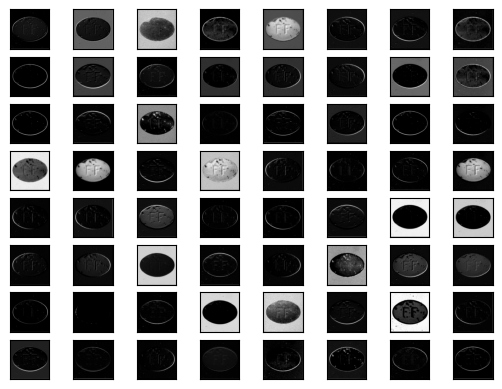

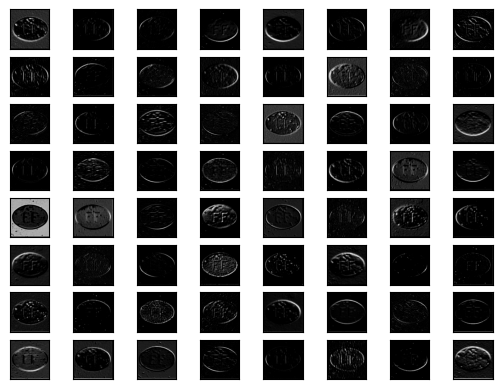

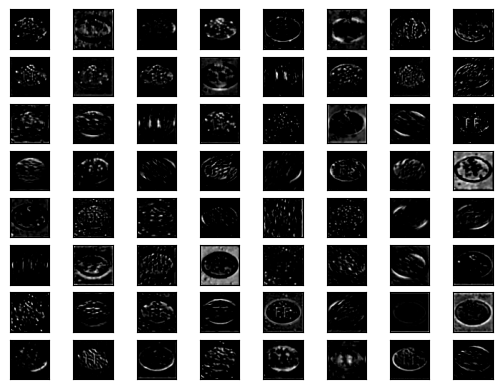

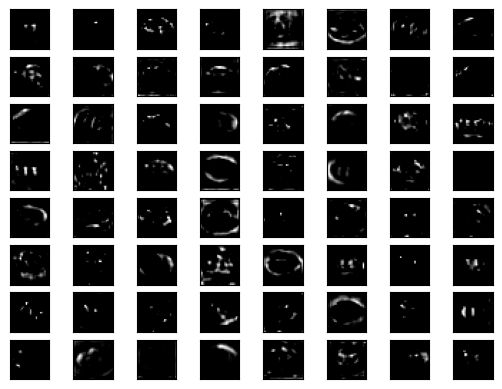

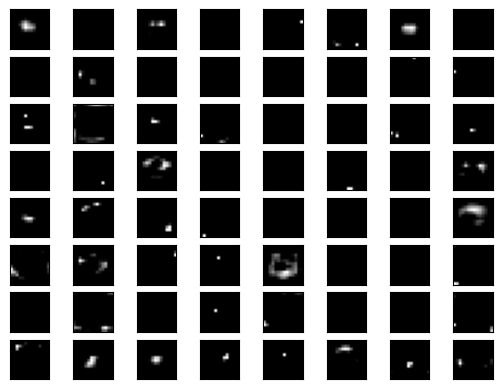

In [ ]:
# visualize feature maps output from each block in the vgg model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import img_to_array
from keras.models import Model
from matplotlib import pyplot
from numpy import expand_dims
# load the model
model = VGG16()
# redefine model to output right after the first hidden layer
ixs = [2, 5, 9, 13, 17]
outputs = [model.layers[i].output for i in ixs]
model = Model(inputs=model.inputs, outputs=outputs)
# load the image with the required shape
img = load_img('/content/pill/test/crack/018.png', target_size=(224, 224))
# convert the image to an array
img = img_to_array(img)
# expand dimensions so that it represents a single 'sample'
img = expand_dims(img, axis=0)
# prepare the image (e.g. scale pixel values for the vgg)
img = preprocess_input(img)
# get feature map for first hidden layer
feature_maps = model.predict(img)
# plot the output from each block
square = 8
for fmap in feature_maps:
	# plot all 64 maps in an 8x8 squares
	ix = 1
	for _ in range(square):
		for _ in range(square):
			# specify subplot and turn of axis
			ax = pyplot.subplot(square, square, ix)
			ax.set_xticks([])
			ax.set_yticks([])
			# plot filter channel in grayscale
			pyplot.imshow(fmap[0, :, :, ix-1], cmap='gray')
			ix += 1
	# show the figure
	pyplot.show()